# TFIDF 활용 문서 유사도 측정

### [코사인 유사도 (Cosine Similarity)]
* 두 벡터가 이루는 각도를 이용해 유사도를 측정하는 방법
    * 벡터 간의 방향이 얼마나 비슷한지를 측정 -> 0에서 1 사이의 값으로 유사도를 나타냄
        * 1에 가까울수록 두 벡터의 방향이 유사하고, 0에 가까울수록 서로 직각을 이룸
        * 방향성만 고려하므로 각 문서들의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있음
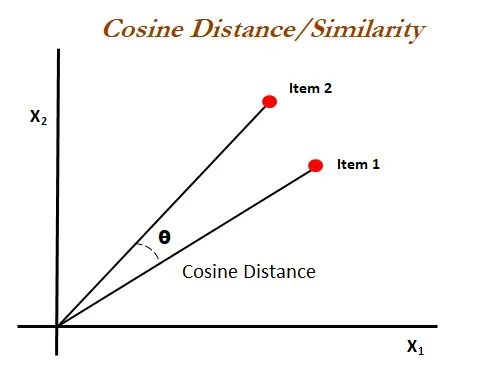 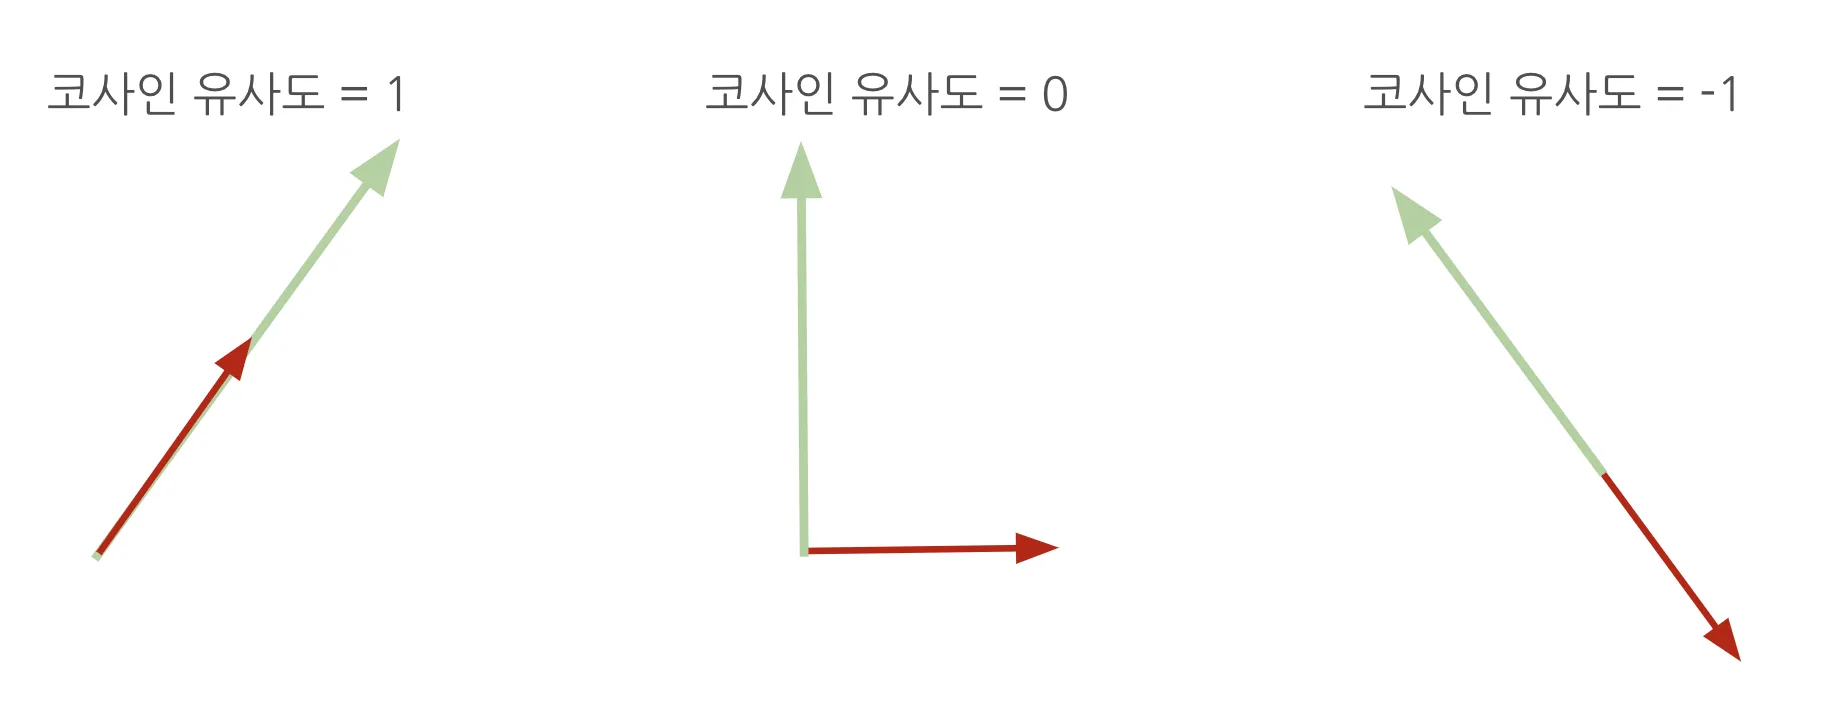

In [ ]:
sample_corpus = [
    '자연어처리 강의를 시작하겠습니다.',
    '자연어처리는 재미있습니다.',
    '밥을 먹고 강의를 듣고 있습니다.',
    '이번 자연어처리 강의는 한국어 자연어처리입니다.' 
]

In [ ]:
# tfidf 특징 벡터 추출
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

sample_tv = TfidfVectorizer(tokenizer = Okt().nouns)
sample_dtm = sample_tv.fit_transform(sample_corpus)
print(sample_dtm.toarray())

In [ ]:
# 문서 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
result = cosine_similarity(sample_dtm[0], sample_dtm[2])
print(result)

In [ ]:
# 1번 문서와 문서 전체와의 코사인 유사도 
result = cosine_similarity(sample_dtm[0], sample_dtm)[0]

print(result)
print(result.argsort()[::-1][1:3])

In [ ]:
# 코사인 유사도 행렬 생성
cosine_sim = cosine_similarity(sample_dtm, sample_dtm)
print(cosine_sim)

# 문서 유사도 기반 영화 추천 시스템
1. 데이터 준비 -> 특징 벡터 추출 -> 코사인 유사도 행렬 생성
2. 입력 영화 제목과 전체 영화와의 문서 유사도 추출
3. 유사도가 높은 순서대로 영화 제목 출력

In [ ]:
# 한국 영화 데이터 샘플 
data_filename = 'korean_movie_sample.json'

import pandas as pd
kmovie_df = pd.read_json('./data/'+data_filename)
kmovie_df.head()

In [ ]:
# 데이터 확인
len(kmovie_df)
kmovie_df.info

#전처리할 때 결측치, 중복차 제거를 무조건 해야함

In [ ]:
# tfidf 특징 벡터 추출
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
kmovie_tv = TfidfVectorizer(tokenizer=Okt().nouns)
kmovie_dtm = kmovie_tv.fit_transform(kmovie_df.content)
print(kmovie_dtm.toarray())

In [ ]:
# 코사인 유사도 행렬 생성
from sklearn.metrics.pairwise import cosine_similarity

kmovie_cs = cosine_similarity(kmovie_dtm, kmovie_dtm)
print(kmovie_cs)

In [ ]:
title = '노트북'
#title = '베테랑'
numRec = 5

# 영화 제목에 해당하는 코사인 유사도 행 찾아오기
result_df = kmovie_df[kmovie_df.name == title]

if result_df.empty:
    print("없는 영화입니다.")
else :
    idx = result_df.index[0]
    result_index = kmovie_cs[idx]
    print(result_index)
    # 내림차순으로 정렬하고, 입력 영화를 제외한 5개의 영화 추출
    result = result_index.argsort()[::-1][1:numRec+1]
    print(result)
    #제목 추출
    print(kmovie_df.name[result])    

In [ ]:
# MovieRecommender 클래스 선언

class MovieRecommender:

    # 생성자 (제목 리스트, 컨텐츠 리스드, 토크나이저)
    def __init__(self, titles, contents, tokenizer):
        self.title_df = pd.DataFrame(titles, columns=['title'])
        print(self.title_df.head())
        tv = TfidfVectorizer(tokenizer=tokenizer)
        tfidf_dtm = tv.fit_transform(contents)
        self.cosine_sim = cosine_similarity(tfidf_dtm, tfidf_dtm)
        print(self.cosine_sim)

    # 추천 영화 제목 리스트 추출 (영화 제목)
    def get_recommendation(self, title, num_result=5):
        result_df = self.title_df[self.title_df.title == title]
        
        if result_df.empty:
            return None
        
        idx = result_df.index[0]
        result_index = self.cosine_sim[idx]
        #print(result_index)
        # 내림차순으로 정렬하고, 입력 영화를 제외한 5개의 영화 추출
        result = result_index.argsort()[::-1][1:num_result+1]
        #print(result)
        #제목 추출
        return list(self.title_df.title[result])


In [ ]:
# 클래스 확인을 위한 객체 생성
mr = MovieRecommender(list(kmovie_df.name), kmovie_df.content, Okt().nouns)

In [ ]:
# 입력한 영화 제목과 유사한 영화 리스트 출력
title = '해리포터'
#title = '베테랑'
result = mr.get_recommendation(title, 3)
if result:
    print(result)
else:
    print("없는 영화입니다")

# Kaggle 영화 데이터 적용 영화 추천 시스템
* title과 overview 데이터 활용
* 영어 데이터의 경우 TfidfVectorizer의 default 사용하되, stop_words='english' 적용

In [1]:
# 데이터 로딩
data_filename = 'movies_metadata.csv'

import pandas as pd
movie_df = pd.read_csv('./'+data_filename,low_memory=False)
movie_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:
# 데이터 수 확인
len(movie_df)

45466

In [3]:
# 데이터를 2만개만 사용
movie_df = movie_df[:20000]

In [4]:
# title과 overview에 결측치 확인
print("title 결측치 :", movie_df['title'].isnull().sum())
print("overview 결측치 :", movie_df['overview'].isnull().sum())

title 결측치 : 2
overview 결측치 : 135


In [5]:
# overview 결측치 -> 빈 스트링
movie_df['overview'] = movie_df['overview'].fillna('')

In [6]:
# title 결측치 -> 삭제
movie_df = movie_df.dropna(subset=['title'])

In [7]:
print("title 결측치 :", movie_df['title'].isnull().sum())
print("overview 결측치 :", movie_df['overview'].isnull().sum())

title 결측치 : 0
overview 결측치 : 0


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
from sklearn.metrics.pairwise import cosine_similarity

# MovieRecommender의 TfidfVectorizer의 기본 tokenizer 사용, 불용어 지정
class MovieRecommender:

    # 생성자 (제목 리스트, 컨텐츠 리스드)
    def __init__(self, titles, contents):
        self.title_df = pd.DataFrame(titles, columns=['title'])
        print(self.title_df.head())
        my_stopwords = 'english'
        tv = TfidfVectorizer(stop_words=my_stopwords)
        tfidf_dtm = tv.fit_transform(contents)
        self.cosine_sim = cosine_similarity(tfidf_dtm, tfidf_dtm)
        print(self.cosine_sim)

    # 추천 영화 제목 리스트 추출 (영화 제목)
    def get_recommendation(self, title, num_result=5):
        result_df = self.title_df[self.title_df.title == title]
        
        if result_df.empty:
            return None
        
        idx = result_df.index[0]
        result_index = self.cosine_sim[idx]
        #print(result_index)
        # 내림차순으로 정렬하고, 입력 영화를 제외한 5개의 영화 추출
        result = result_index.argsort()[::-1][1:num_result+1]
        #print(result)
        #제목 추출
        return list(self.title_df.title[result])


In [18]:
# MovieRecommender 객체 생성
mr = MovieRecommender(list(movie_df.title), movie_df.overview)

                         title
0                    Toy Story
1                      Jumanji
2             Grumpier Old Men
3            Waiting to Exhale
4  Father of the Bride Part II
[[1.         0.01575739 0.         ... 0.         0.         0.        ]
 [0.01575739 1.         0.04907338 ... 0.         0.         0.        ]
 [0.         0.04907338 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.08375789]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.08375789 0.         1.        ]]


In [19]:
# 추천 영화 확인
title = 'Toy Story'
result = mr.get_recommendation(title)
if result:
    print(result)
else:
    print("없는 영화입니다")

['Toy Story 3', 'Toy Story 2', 'The 40 Year Old Virgin', 'The Champ', 'Rebel Without a Cause']


In [20]:
#[참고] movie_df에 있는 영화 제목 찾아보기
movie_df[movie_df.title.str.contains('Terminator')]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
582,False,"{'id': 528, 'name': 'The Terminator Collection...",100000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,280,tt0103064,en,Terminator 2: Judgment Day,Nearly 10 years have passed since Sarah Connor...,...,1991-07-01,520000000.0,137.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It's nothing personal.,Terminator 2: Judgment Day,False,7.7,4274.0
1195,False,"{'id': 528, 'name': 'The Terminator Collection...",6400000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://www.mgm.com/#/our-titles/1970/The-Termi...,218,tt0088247,en,The Terminator,"In the post-apocalyptic future, reigning tyran...",...,1984-10-26,78371200.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your future is in his hands.,The Terminator,False,7.4,4208.0
6388,False,"{'id': 528, 'name': 'The Terminator Collection...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,296,tt0181852,en,Terminator 3: Rise of the Machines,It's been 10 years since John Connor saved Ear...,...,2003-07-02,435000000.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,False,5.9,2177.0
13693,False,"{'id': 528, 'name': 'The Terminator Collection...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://www.warnerbros.com/terminator-salvation,534,tt0438488,en,Terminator Salvation,"All grown up in post-apocalyptic 2018, John Co...",...,2009-05-20,371353001.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The End Begins.,Terminator Salvation,False,5.9,2496.0
